# 5. Ensemble-Methoden

**KI1-Projekt 308** — California Housing Datensatz

**Schwerpunkt P3:** Random Forest, Gradient Boosting,
Hyperparameter-Tuning via GridSearchCV.

Vorlage: Kapitel 7 Folien, Ensemble-Code aus ki_i_vl

In [6]:
import sys
sys.path.insert(0, '..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
)
from sklearn.model_selection import GridSearchCV

from utils.data import load_and_clean_data, get_train_test_split
from utils.evaluation import evaluate_model, add_result
from utils.plotting import (
    plot_predicted_vs_actual, plot_residuals,
    plot_feature_importances, save_fig,
)

plt.rcParams['figure.dpi'] = 100
%matplotlib inline

## 5.1 Daten laden

In [7]:
df = load_and_clean_data()
X_train, X_test, y_train, y_test, feature_names = get_train_test_split(df)

## 5.2 Random Forest — Baseline

In [8]:
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

result_rf = evaluate_model(rf, X_train, X_test, y_train, y_test, "Random Forest (100 Trees)")
add_result(result_rf)


  Random Forest (100 Trees)
  R² Score:  Train = 0.9704  |  Test = 0.7861
  MAE:       Train = 0.1096  |  Test = 0.2935
  RMSE:      Train = 0.1652  |  Test = 0.4409


## 5.3 Random Forest — Hyperparameter-Tuning

In [9]:
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
}

# Hinweis: GridSearchCV dauert je nach Rechner einige Minuten
grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid_rf,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1,
)
grid_rf.fit(X_train, y_train)

print(f"Beste Parameter: {grid_rf.best_params_}")
print(f"Bester CV R²: {grid_rf.best_score_:.4f}")

result_rf_tuned = evaluate_model(
    grid_rf.best_estimator_, X_train, X_test, y_train, y_test,
    "Random Forest (tuned)"
)
add_result(result_rf_tuned)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Beste Parameter: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}
Bester CV R²: 0.7836

  Random Forest (tuned)
  R² Score:  Train = 0.9714  |  Test = 0.7881
  MAE:       Train = 0.1079  |  Test = 0.2913
  RMSE:      Train = 0.1623  |  Test = 0.4389


Gespeichert: results/rf_feature_importances.png und results/rf_feature_importances.pdf


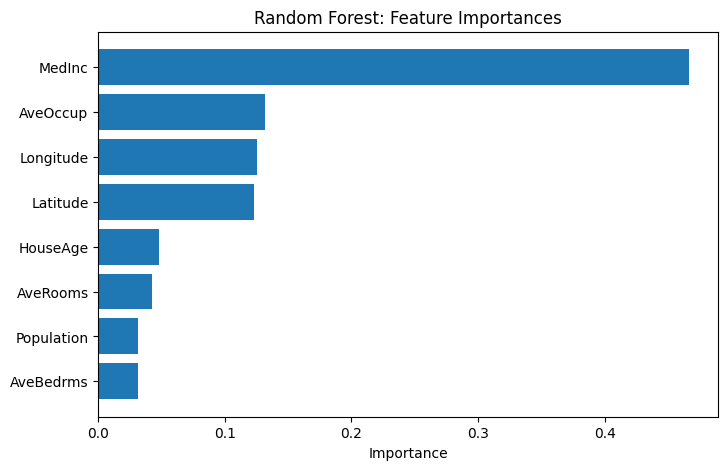

In [10]:
fig, ax = plot_feature_importances(
    grid_rf.best_estimator_.feature_importances_, feature_names,
    title="Random Forest: Feature Importances",
    save_name="rf_feature_importances"
)
plt.show()

## 5.4 Gradient Boosting

In [11]:
gb = GradientBoostingRegressor(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
)
gb.fit(X_train, y_train)

result_gb = evaluate_model(gb, X_train, X_test, y_train, y_test, "Gradient Boosting (200 Trees)")
add_result(result_gb)


  Gradient Boosting (200 Trees)
  R² Score:  Train = 0.8927  |  Test = 0.8128
  MAE:       Train = 0.2240  |  Test = 0.2822
  RMSE:      Train = 0.3146  |  Test = 0.4125


## 5.5 Gradient Boosting — Hyperparameter-Tuning

In [12]:
param_grid_gb = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
}

grid_gb = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid_gb,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1,
)
grid_gb.fit(X_train, y_train)

print(f"Beste Parameter: {grid_gb.best_params_}")
print(f"Bester CV R²: {grid_gb.best_score_:.4f}")

result_gb_tuned = evaluate_model(
    grid_gb.best_estimator_, X_train, X_test, y_train, y_test,
    "Gradient Boosting (tuned)"
)
add_result(result_gb_tuned)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Beste Parameter: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500}
Bester CV R²: 0.8187

  Gradient Boosting (tuned)
  R² Score:  Train = 0.9825  |  Test = 0.8248
  MAE:       Train = 0.0934  |  Test = 0.2699
  RMSE:      Train = 0.1270  |  Test = 0.3990


Gespeichert: results/ensemble_comparison.png und results/ensemble_comparison.pdf


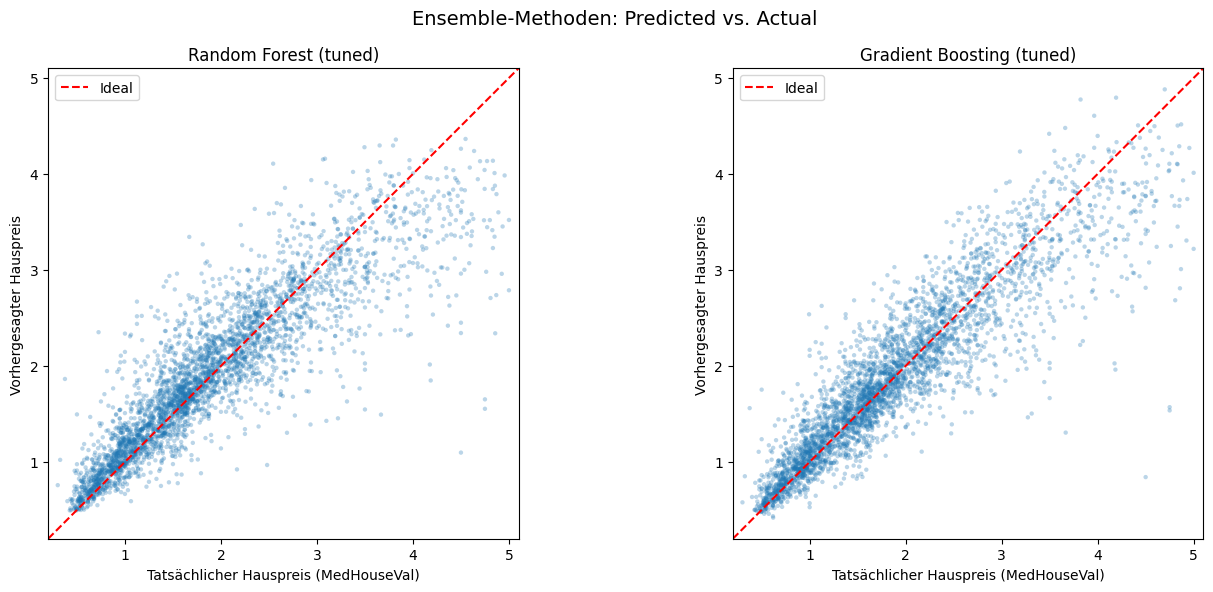

In [13]:
# Vergleichsplot: Random Forest vs. Gradient Boosting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

plot_predicted_vs_actual(
    y_test, grid_rf.best_estimator_.predict(X_test),
    title="Random Forest (tuned)", ax=axes[0]
)
plot_predicted_vs_actual(
    y_test, grid_gb.best_estimator_.predict(X_test),
    title="Gradient Boosting (tuned)", ax=axes[1]
)

fig.suptitle("Ensemble-Methoden: Predicted vs. Actual", fontsize=14)
fig.tight_layout()
save_fig(fig, "ensemble_comparison")
plt.show()

## 5.6 Zusammenfassung

| Erkenntnis | Detail |
|-----------|--------|
| Random Forest | Deutlich besser als einzelner Decision Tree |
| Gradient Boosting | Oft bestes Ensemble-Verfahren |
| Feature Importance | Konsistent: MedInc dominiert |
| Hyperparameter | Tuning lohnt sich, besonders learning_rate bei GB |